**`Rough solution for the Bessel Equation and will optimise it for the future(If possible). But good to get an approximate idea about any point.`**

In [ ]:
# Now modified code from the previous reference as:

import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [ ]:
# Neural Network Model Definition
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        return self.fc3(x)

In [ ]:

# Bessel's Differential Equation Residual Definition
def bessel_residual(net, x, n):
    y = net(x)

    # First derivative y'
    y_prime = torch.autograd.grad(outputs=y, inputs=x,
                                  grad_outputs=torch.ones_like(y), create_graph=True)[0]

    # Second derivative y''
    y_double_prime = torch.autograd.grad(outputs=y_prime, inputs=x,
                                         grad_outputs=torch.ones_like(y_prime), create_graph=True)[0]

    # Bessel's equation: x^2 * y'' + x * y' + (x^2 - n^2) * y = 0
    residual = x**2 * y_double_prime + x * y_prime + (x**2 - n**2) * y
    return residual

In [ ]:

# Loss Function Definition
def loss_function(net, x, n):
    residual = bessel_residual(net, x, n)

    # Example boundary conditions (can modify depending on requirements)
    boundary_loss = (net(torch.tensor([[1.0]])) - 1.0)**2  # y(1) = 1

    # Total loss: sum of squared residuals + boundary condition loss
    return torch.mean(residual**2) + boundary_loss

In [ ]:
# Function to Train the Neural Network
def train_bessel_nn(n, epochs=10000, lr=0.001):
    net = Net()
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)

    x = torch.linspace(0.01, 10, 100, requires_grad=True).view(-1, 1)  # Training domain points

    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = loss_function(net, x, n)
        loss.backward()
        optimizer.step()

        if epoch % 1000 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

    return net, x

In [ ]:

# Plotting Function
def plot_bessel_solution(net, x):
    with torch.no_grad():
        y_pred = net(x).detach().numpy()
        plt.plot(x.numpy(), y_pred, label='Neural Network Solution')
        plt.title(f'Bessel Function Approximation using Neural Network (n={n})')
        plt.xlabel('x')
        plt.ylabel('y(x)')
        plt.legend()
        plt.grid(True)
        plt.show()


In [ ]:

# Function to Print Final Solution
def print_bessel_solution(net, x):
    with torch.no_grad():
        y_pred = net(x).detach().numpy()
        print("x values: ", x.numpy().flatten())
        print("Approximated y(x) values: ", y_pred.flatten())


Epoch 0, Loss: 170.5560302734375
Epoch 1000, Loss: 0.6458576917648315
Epoch 2000, Loss: 0.48520970344543457
Epoch 3000, Loss: 0.4747818410396576
Epoch 4000, Loss: 0.4702288508415222
Epoch 5000, Loss: 0.4581555426120758
Epoch 6000, Loss: 0.45313185453414917
Epoch 7000, Loss: 0.4538610875606537
Epoch 8000, Loss: 0.44864436984062195
Epoch 9000, Loss: 0.44700413942337036
x values:  [ 0.01        0.11090909  0.21181819  0.31272727  0.41363636  0.51454544
  0.61545455  0.71636367  0.8172727   0.91818184  1.0190909   1.12
  1.2209091   1.3218182   1.4227272   1.5236363   1.6245455   1.7254546
  1.8263637   1.9272728   2.0281818   2.129091    2.23        2.330909
  2.4318182   2.5327272   2.6336365   2.7345455   2.8354545   2.9363637
  3.0372727   3.138182    3.239091    3.34        3.4409091   3.5418181
  3.6427274   3.7436364   3.8445454   3.9454546   4.046364    4.1472726
  4.248182    4.349091    4.45        4.550909    4.6518183   4.7527275
  4.8536363   4.9545455   5.0554547   5.1563635 

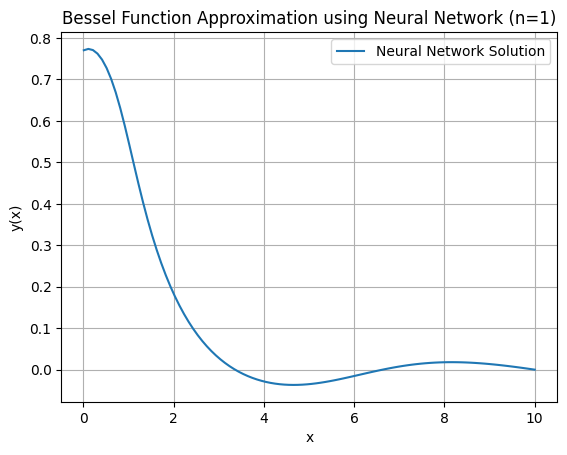

In [ ]:
# Main Execution
if __name__ == "__main__":
    n = 1
    net, x = train_bessel_nn(n)

    # Print final solution
    print_bessel_solution(net, x)

    # Plot the solution
    plot_bessel_solution(net, x)

Epoch 0, Loss: 22.06051254272461
Epoch 1000, Loss: 0.9049965143203735
Epoch 2000, Loss: 0.8989737629890442
Epoch 3000, Loss: 0.8971678018569946
Epoch 4000, Loss: 0.9477072954177856
Epoch 5000, Loss: 0.8965728878974915
Epoch 6000, Loss: 0.8984631896018982
Epoch 7000, Loss: 0.8963600397109985
Epoch 8000, Loss: 0.8963245153427124
Epoch 9000, Loss: 0.8962931036949158
x values:  [ 0.01        0.11090909  0.21181819  0.31272727  0.41363636  0.51454544
  0.61545455  0.71636367  0.8172727   0.91818184  1.0190909   1.12
  1.2209091   1.3218182   1.4227272   1.5236363   1.6245455   1.7254546
  1.8263637   1.9272728   2.0281818   2.129091    2.23        2.330909
  2.4318182   2.5327272   2.6336365   2.7345455   2.8354545   2.9363637
  3.0372727   3.138182    3.239091    3.34        3.4409091   3.5418181
  3.6427274   3.7436364   3.8445454   3.9454546   4.046364    4.1472726
  4.248182    4.349091    4.45        4.550909    4.6518183   4.7527275
  4.8536363   4.9545455   5.0554547   5.1563635   5.

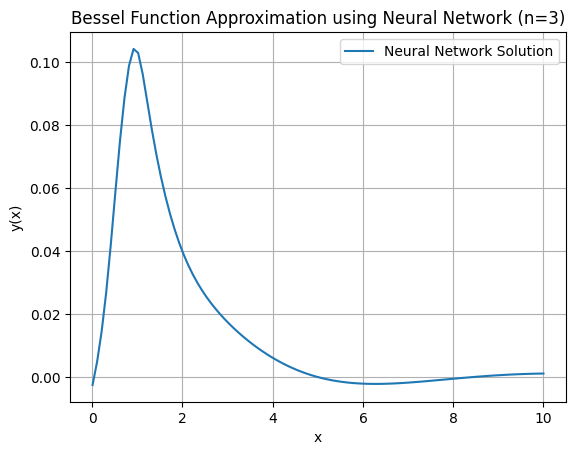

In [ ]:
# Main Execution
if __name__ == "__main__":
    n = 3
    net, x = train_bessel_nn(n)

    # Print final solution
    print_bessel_solution(net, x)

    # Plot the solution
    plot_bessel_solution(net, x)

Epoch 0, Loss: 26.48453140258789
Epoch 1000, Loss: 0.9925474524497986
Epoch 2000, Loss: 0.9920302033424377
Epoch 3000, Loss: 0.9916155338287354
Epoch 4000, Loss: 0.990933895111084
Epoch 5000, Loss: 0.9904780387878418
Epoch 6000, Loss: 0.9900268912315369
Epoch 7000, Loss: 0.9897357821464539
Epoch 8000, Loss: 0.9892836809158325
Epoch 9000, Loss: 0.9887320399284363
x values:  [ 0.01        0.11090909  0.21181819  0.31272727  0.41363636  0.51454544
  0.61545455  0.71636367  0.8172727   0.91818184  1.0190909   1.12
  1.2209091   1.3218182   1.4227272   1.5236363   1.6245455   1.7254546
  1.8263637   1.9272728   2.0281818   2.129091    2.23        2.330909
  2.4318182   2.5327272   2.6336365   2.7345455   2.8354545   2.9363637
  3.0372727   3.138182    3.239091    3.34        3.4409091   3.5418181
  3.6427274   3.7436364   3.8445454   3.9454546   4.046364    4.1472726
  4.248182    4.349091    4.45        4.550909    4.6518183   4.7527275
  4.8536363   4.9545455   5.0554547   5.1563635   5.2

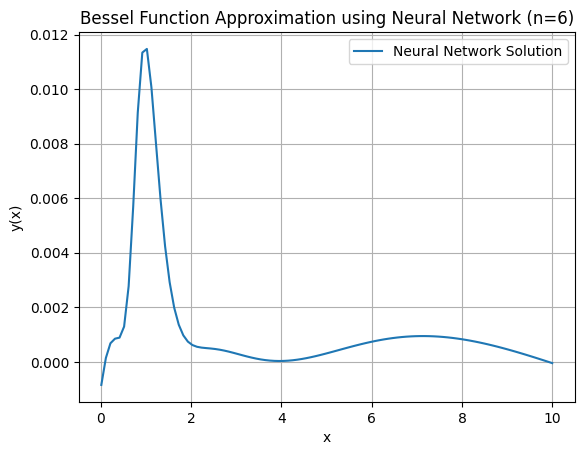

In [ ]:
# Main Execution
if __name__ == "__main__":
    n = 6
    net, x = train_bessel_nn(n)

    # Print final solution
    print_bessel_solution(net, x)

    # Plot the solution
    plot_bessel_solution(net, x)